In [1]:
import numpy as np

#Deriving a linear function
# Given data
x = np.array([2, 3, 5, 7, 9])
y = np.array([7, 9, 13, 17, 21])

# Calculate the slope (m) and y-intercept (b)
m, b = np.polyfit(x, y, 1)

# Print the results
print("Slope (m):", m)
print("Y-intercept (b):", b)

# Create the linear function
def linear_function(x):
    return m * x + b

Slope (m): 1.9999999999999996
Y-intercept (b): 2.9999999999999925


In [2]:
linear_function(9)

20.99999999999999

In [34]:
# # y=m1x1+m2x2+m3x3+b
# # Assuming x1, x2, and x3 are arrays of the same length
# # Create a design matrix X by stacking x1, x2, and x3 horizontally
# X = np.column_stack((x1, x2, x3))

# # Add a column of ones to the design matrix to account for the intercept (b)
# X = np.column_stack((np.ones_like(x1), X))

# # Fit a linear regression model to the data
# coefficients, residuals, _, _ = np.linalg.lstsq(X, y, rcond=None)

# # The coefficients are in the 'coefficients' variable
# # The first element is the intercept (b), and the remaining elements are m1, m2, and m3
# b = coefficients[0]
# m1, m2, m3 = coefficients[1:]

# # Print the coefficients and intercept
# print("Intercept (b):", b)
# print("Coefficient for x1 (m1):", m1)
# print("Coefficient for x2 (m2):", m2)
# print("Coefficient for x3 (m3):", m3)

**Project: Gradient Descent For Neural Network - Batch Gradient** 
<br>
**Data: Insurance Data**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


Split data into training data and testing data

In [7]:
df.shape

(28, 3)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size = 0.2, random_state = 25)

In [8]:
len(X_train)

22

In [9]:
X_train_scaled = X_train.copy()
X_train_scaled ["age"] = X_train_scaled ["age"]/100

X_test_scaled = X_test.copy()
X_test_scaled ["age"] = X_test_scaled ["age"]/100

In [10]:
X_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


In [11]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 599ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1/1 [===

In [14]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 164ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497763752937317, 1.0]

In [16]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 72ms/step


array([[0.70548475],
       [0.3556957 ],
       [0.16827832],
       [0.4780119 ],
       [0.72606957],
       [0.82949823]], dtype=float32)

In [17]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [18]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [19]:
#To find the final weights achieved after trainining use get weights
coeff, intercept = model.get_weights()
coeff, intercept

(array([[5.0608625],
        [1.408652 ]], dtype=float32),
 array([-2.9137027], dtype=float32))

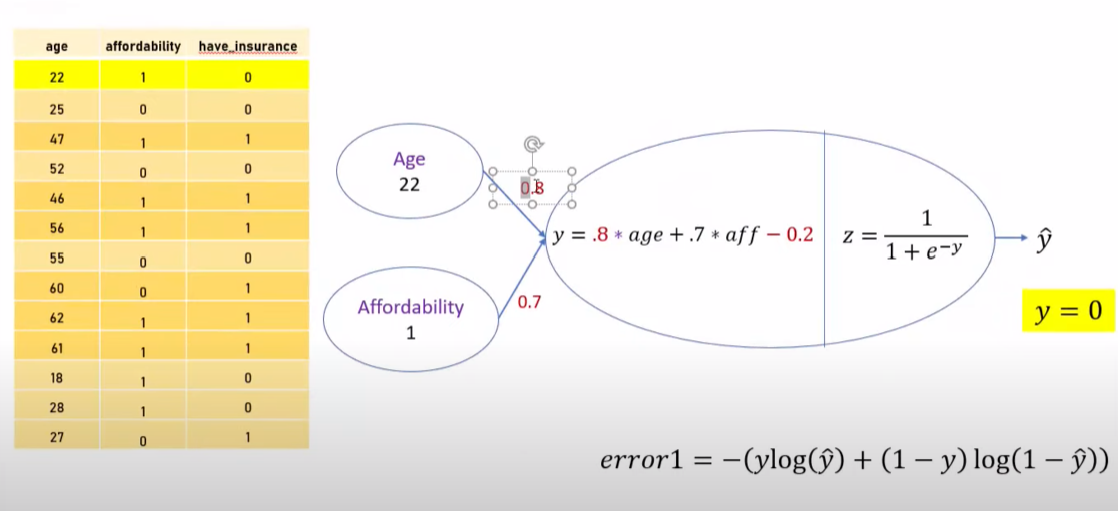

This means w1=5.060867, w2=1.4086502, bias =-2.9137027

**Let's make the prediction function using the linear equation and sigmoid activator**

In [20]:
# Recall, the neron has a linear equation and a sigmoid activator
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [24]:
def prediction_function(age,affordability):
    weighted_sum = coeff[0]*age + coeff[1]*affordability + intercept
    return sigmoid(weighted_sum)
    

In [25]:
prediction_function(0.47, 1)

0.7054847702382996

In [26]:
prediction_function(0.18, 1)

0.35569571637887243

**Now let's make a neural network from scratch**

In [16]:
# The sigmoid function transforms any real number to one between 0 and 1
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [17]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

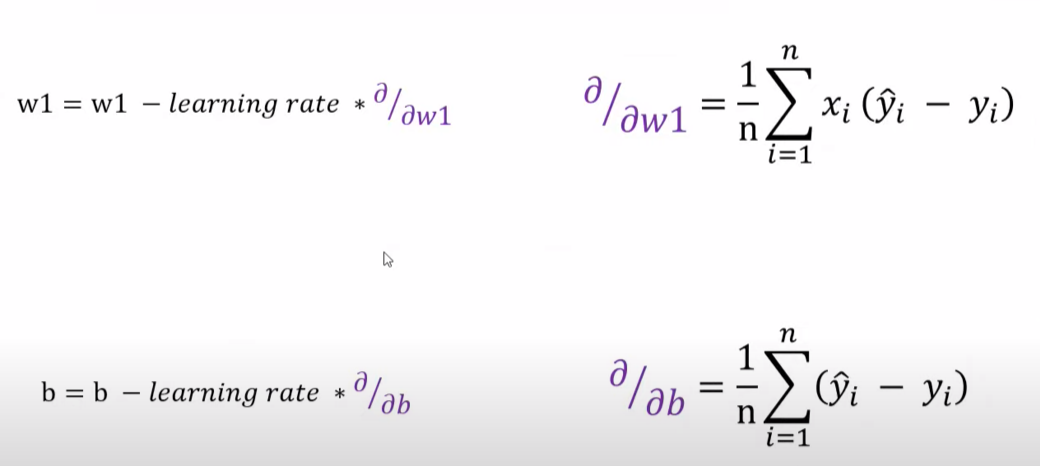

In [30]:
# The aim of the gradient decent is to find the coefficients and intercept of the linear equation
# w1, w2 and bias 
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [31]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [35]:
# Compare the coefficients and intercept above with the ones from tensorflow: w1=5.060867, w2=1.4086502, bias =-2.9137027
coeff, intercept

(array([[5.0608625],
        [1.408652 ]], dtype=float32),
 array([-2.9137027], dtype=float32))

The coeeficients and intercept are the same
<br>
This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function

In [18]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_threshold):
        self.w1, self.w2, self.bias = self.gradient_descent(X["age"], X["affordibility"], y, epochs, loss_threshold)

    def predict (self, X_test):
        weighted_summ = self.w1 * X_test["age"] + self.w2 * X_test ["affordibility"] + self.bias
        return sigmoid_numpy(weighted_summ)
        
    def gradient_descent(self, age, affordability, y_true, epochs, loss_threshold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
    
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 
    
            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
    
            #Print the log only when the iteration is 50 or a multiple of 50
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
    
            if loss<=loss_threshold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break
    
        return w1, w2, bias


In [19]:
customModel = myNN ()
customModel.fit(X_train_scaled, y_train, epochs=500, loss_threshold = 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917


In [20]:
# Let's compare it with the tensorflow w1,w2 and bias
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

This result is almost similar to the output on cell 16 for the model.predict - tensorflow version